<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/08_SentimentAnalysisNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ENCODING TYPES 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
wordcount = 10000
(trainx, trainy),(testx,testy) = keras.datasets.imdb.load_data(num_words=wordcount)
# THIS IS AN TENSORFLOW FUNCTION -> own syntax, train_test_split 


17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# Currently Label Encoding, let's convert to Multi-Hot encoding
def multi_hot_seq(text, dim):
  seq = np.zeros((len(text), dim)) # index of this seq is the word index!
  for i,word in enumerate(text):
    seq[i,word] = 1 # on index i and for column number "word" -> set 0 to 1 
  return seq

trainx_mod = multi_hot_seq(trainx, wordcount)
testx_mod = multi_hot_seq(testx, wordcount)
for i in range(20):
  print(trainx_mod[i])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


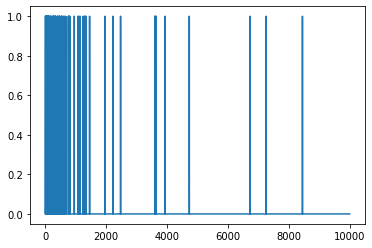

In [4]:
plt.plot(trainx_mod[100])

In [5]:
# NO EMBEDDINGS PRESENT! Direct hot-cold map of words to derive sentiment logic
# Our neural network doesn't require an Embedding layer now- there is no embedding to detect!!!
HP_l1 = 16
HP_l2 = 16
HP_epochs = 30
HP_batchsize = 512
model = keras.Sequential()
model.add(keras.layers.Dense(HP_l1, activation=tf.nn.relu, input_shape=(wordcount,)))
model.add(keras.layers.Dense(HP_l2, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','binary_crossentropy'])
model.summary()
# 10,000 X 16 + 16
# 16 X 16 + 16
# 16 X 1 + 1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
HP_l1_large = 128
HP_l2_large = 128
HP_epochs_large = 30
HP_batchsize_large = 512
model_large = keras.Sequential()
model_large.add(keras.layers.Dense(HP_l1_large, activation=tf.nn.relu, input_shape=(wordcount,)))
model_large.add(keras.layers.Dropout(0.5))
model_large.add(keras.layers.Dense(HP_l2_large, activation=tf.nn.relu))
model_large.add(keras.layers.Dropout(0.25))
model_large.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model_large.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','binary_crossentropy'])
model_large.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
HP_l1_small = 4
HP_l2_small = 4
HP_epochs_small = 30
HP_batchsize_small = 512
model_small = keras.Sequential()
model_small.add(keras.layers.Dense(HP_l1_small, activation=tf.nn.relu, input_shape=(wordcount,)))
model_small.add(keras.layers.Dense(HP_l2_small, activation=tf.nn.relu, kernel_regularizer= keras.regularizers.l2(0.001)))
model_small.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model_small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','binary_crossentropy'])
model_small.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
myModels = [model_small, model, model_large]
# compare in loop
hist = model.fit(trainx_mod, trainy, epochs=20, batch_size=HP_batchsize, validation_data=(testx_mod, testy),verbose=0)
print('first over')
hist_small= model_small.fit(trainx_mod, trainy, epochs=20, batch_size=HP_batchsize, validation_data=(testx_mod, testy),verbose=0)
print('second over')
hist_large= model_large.fit(trainx_mod, trainy, epochs=20, batch_size=HP_batchsize, validation_data=(testx_mod, testy),verbose=0)
print('all over')

first over
second over
all over


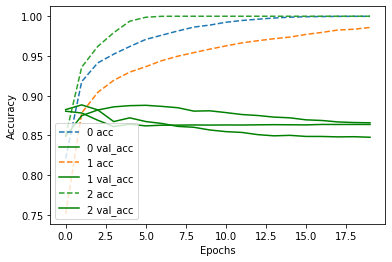

In [9]:
def plots(histories): # this could have been loss or acc
  plt.figure()
  for i, history in enumerate(histories):
    val = plt.plot(history.epoch, history.history['acc'], '--', label=str(i)+' acc')
    plt.plot(history.epoch, history.history['val_acc'], color='g', label=str(i)+' val_acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

plots([hist, hist_small, hist_large])
  



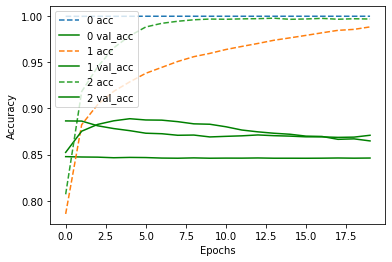

In [13]:

plots([hist, hist_small, hist_large])